# What does this project do?
1) Features:
a) Answers questions about products, including descriptions, prices, categories, brands, market prices, sub-categories, types, and ratings.
b) Handles user queries with predefined keyword patterns (e.g., "What is the price of Product X?") and provides answers accordingly.
c) Allows users to search for products containing specific keywords and choose from multiple results.
d) Enables users to specify a category when multiple products match their query.
Offers a user-friendly interface for interactive communication with the chatbot.

2) Implementation: The project is implemented in Python using the pandas library for data manipulation and natural language processing (NLP) techniques to recognize user intent and keywords.

3) Use Cases: This chatbot can be useful for customers and employees to quickly access product information, such as prices, descriptions, and categories, without needing to manually search through a large dataset.

4) Flexibility: The chatbot can be customized by modifying keyword patterns, adding new features, or integrating with external data sources, making it adaptable to various use cases.

5) Improvements: Future enhancements may include incorporating advanced NLP techniques, integrating with external databases, and optimizing the user interface for better user experience.

6) Overall: The Product Information Chatbot streamlines product information retrieval, making it efficient and user-friendly for both customers and employees interacting with the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('BigBasket Products.csv')

In [3]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
df.shape

(27555, 10)

In [5]:
df.index = range(1, len(df) + 1)
df = df.drop(columns = 'index')

In [6]:
df['category'] = df['category'].str.replace("&",",")

In [7]:
(df['sale_price']==df['market_price']).value_counts()

False    15229
True     12326
dtype: int64

# Here in the  dataset we can see 2903 products are at discounted price

In [8]:
mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)

In [9]:
empty_space_indices = df.loc[df['description'].isna()].index

In [10]:
df['New_Description'] = df['product'] + ' | ' + df['category'] + ' | ' + df['sub_category'] + ' | ' + df['brand'] + ' | ' + df['type']
df['description'].fillna(df['New_Description'], inplace=True)
df.drop(columns=['New_Description'], inplace=True)

In [11]:
product_names = df['product']
product_names_list = product_names.tolist()
df['product_name'] = df['product']
df['product_name'] = df['product'].str.split(' - ').str.get(0)

In [12]:
df.sample(3)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,product_name
13776,Sugar Free Ambrosia Taste Of Honey - Natural G...,"Gourmet , World Food","Sauces, Spreads & Dips",Sugarless Bliss,165.00,165.0,"Jams, Marmalade, Spreads",3.30000,Sugar Free suitable for Diabetes. Made with wh...,Sugar Free Ambrosia Taste Of Honey
8924,"Brinjal - Varikatri, Organically Grown","Fruits , Vegetables",Organic Fruits & Vegetables,Fresho,10.00,12.5,Organic Vegetables,3.94341,It Is Organically Grown And Handpicked From Fa...,Brinjal
15980,Natural Ultra Soft Superr Pads - For Maternity...,"Beauty , Hygiene",Feminine Hygiene,Sirona,245.65,289.0,Sanitary Napkins,4.80000,"These are environmentally responsible pads, ma...",Natural Ultra Soft Superr Pads


# Here we fill description with empty spaces by a few of columns in dataset. This will help us to make meaningfull sentence and help in keywords

# EDA

In [13]:
(df['rating']==5.0).value_counts()

False    26148
True      1407
Name: rating, dtype: int64

# There are over 1407 products with 5 rating


In [14]:
df = df.dropna()

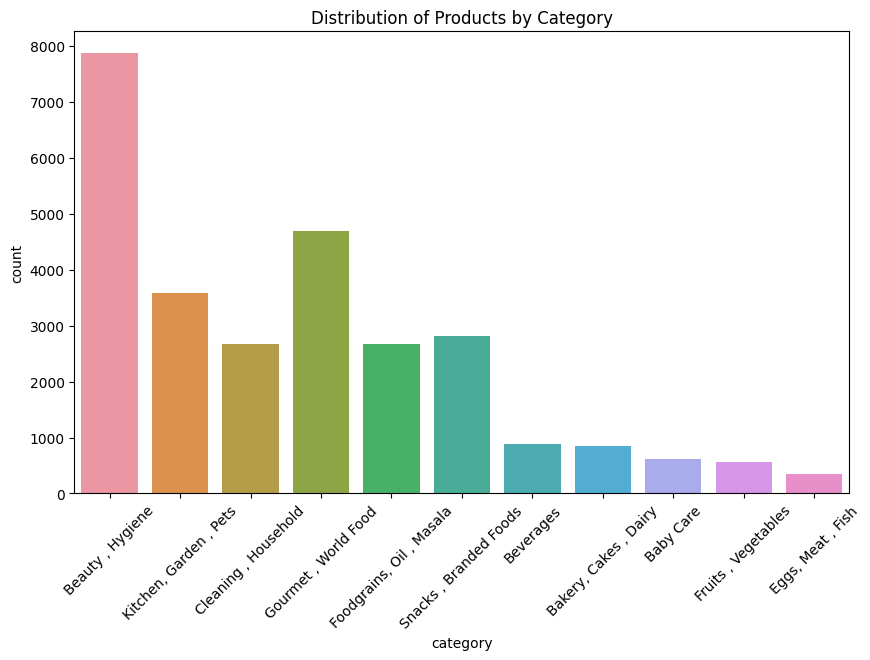

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.xticks(rotation=45)
plt.title('Distribution of Products by Category')
plt.show()

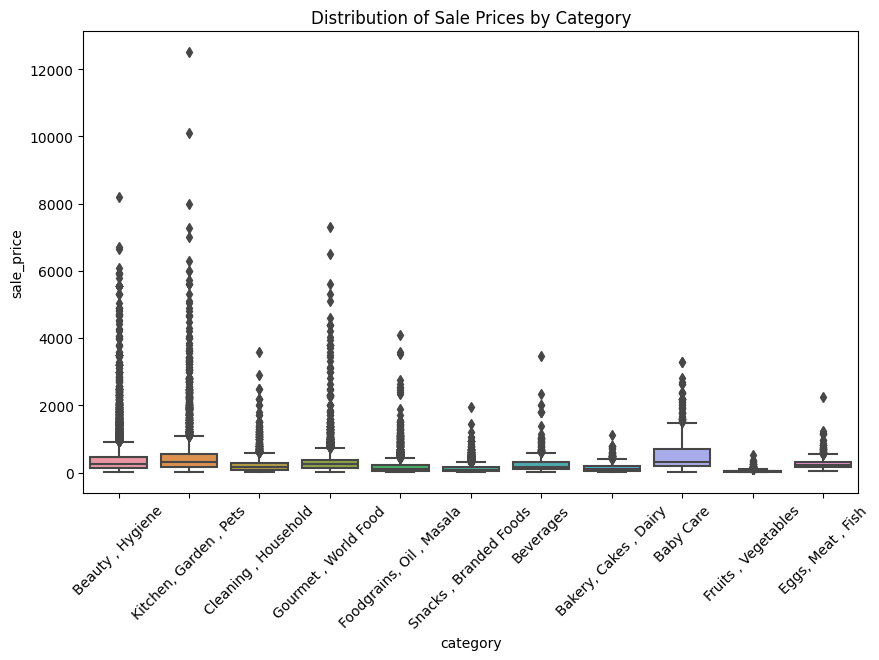

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='sale_price')
plt.xticks(rotation=45)
plt.title('Distribution of Sale Prices by Category')
plt.show()

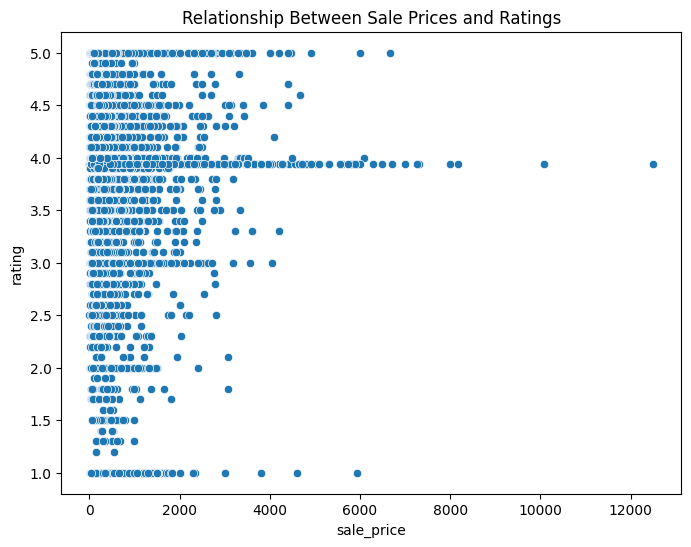

In [17]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sale_price', y='rating')
plt.title('Relationship Between Sale Prices and Ratings')
plt.show()

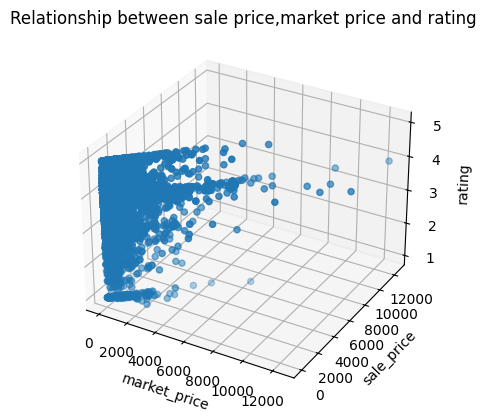

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['market_price']
y = df['sale_price']
z = df['rating']

ax.scatter(x, y, z)

ax.set_xlabel('market_price')
ax.set_ylabel('sale_price')
ax.set_zlabel('rating')
plt.title("Relationship between sale price,market price and rating")
plt.show()


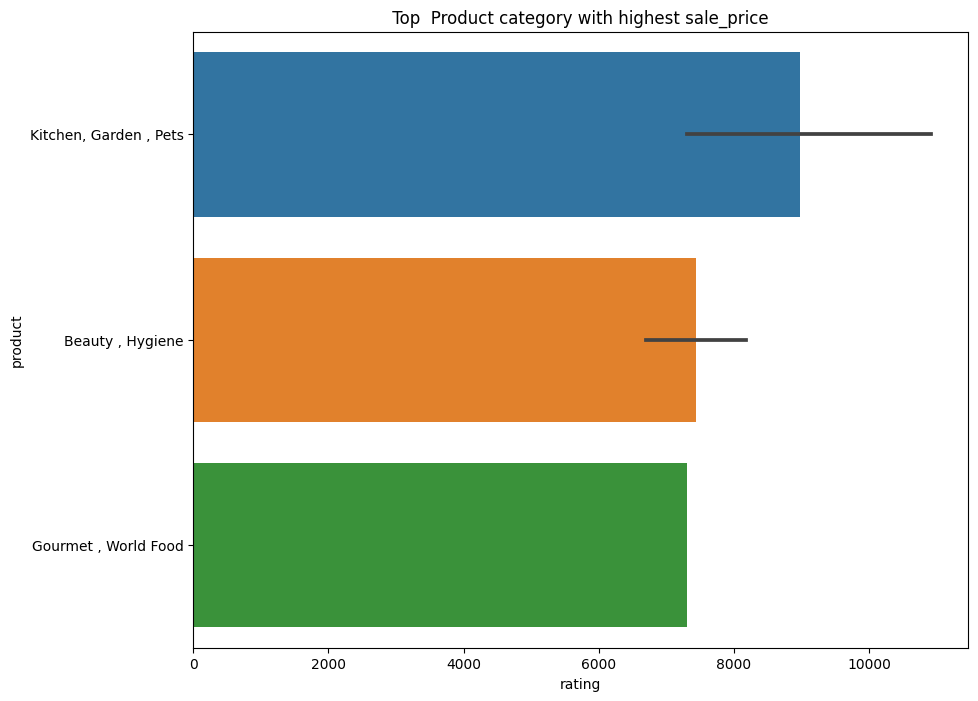

In [19]:
sorted_df = df.sort_values(by='sale_price', ascending=False)

top_10_states_2001= sorted_df.head(8)

plt.figure(figsize=(10, 8)) 
sns.barplot(data=top_10_states_2001, y='category', x='sale_price', orient='h')

plt.xlabel('rating')
plt.ylabel('product')
plt.title(' Top  Product category with highest sale_price ')

plt.show()

In [20]:
correlation_matrix = df[['sale_price', 'market_price', 'rating']].corr()
correlation_matrix

,sale_price,market_price,rating
sale_price,1.000000,0.965198,-0.049228
market_price,0.965198,1.000000,-0.062247
rating,-0.049228,-0.062247,1.000000


In [21]:
category_summary = df.groupby('category')[['sale_price', 'rating']].mean()
category_summary

,sale_price,rating
category,,
Baby Care,534.946180,4.008768
"Bakery, Cakes , Dairy",142.802750,3.918184
"Beauty , Hygiene",418.679197,3.934551
Beverages,239.803925,4.044565
"Cleaning , Household",226.239001,3.953821
"Eggs, Meat , Fish",288.897486,3.943410
"Foodgrains, Oil , Masala",193.167500,4.040757
"Fruits , Vegetables",50.889336,3.943410
"Gourmet , World Food",319.854011,3.964382


# Training


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [23]:
df['description'].fillna('', inplace=True)


In [24]:
df1 = pd.DataFrame(df, columns=["description", "category"])

X_train, X_test, y_train, y_test = train_test_split(df["description"], df["category"], test_size=0.3, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [25]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7454633438180498
Classification Report:
                           precision    recall  f1-score   support

               Baby Care       1.00      0.15      0.26       191
   Bakery, Cakes , Dairy       1.00      0.01      0.02       263
        Beauty , Hygiene       0.81      0.99      0.89      2266
               Beverages       0.00      0.00      0.00       272
    Cleaning , Household       0.99      0.68      0.80       843
       Eggs, Meat , Fish       1.00      0.02      0.04       100
Foodgrains, Oil , Masala       0.94      0.61      0.74       812
     Fruits , Vegetables       1.00      0.38      0.55       164
    Gourmet , World Food       0.49      0.96      0.65      1413
  Kitchen, Garden , Pets       0.91      0.94      0.92      1103
  Snacks , Branded Foods       0.90      0.43      0.58       839

                accuracy                           0.75      8266
               macro avg       0.82      0.47      0.50      8266
            weighted 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Now we do our main task of chatbot


In [26]:
def get_product_info(product_name):
    product_info = df[df['product'].str.contains(product_name, case=False, na=False)]
    return product_info

user_input = input ("Please input Product name \n")


result = get_product_info(user_input)


if not result.empty:
    result.to_markdown(index=False)
else:
    f"No product found for '{user_input}'."
result


Please input Product name 
PAPAD


,product,category,sub_category,brand,sale_price,market_price,type,rating,description,product_name
815,Papad - Special Punjabi Masala,"Snacks , Branded Foods",Ready To Cook & Eat,Atish,90.0,90.0,"Papads, Ready To Fry",3.20000,"Urad Dal Flour, Salt, Water, Hings, Calcium Bi...",Papad
1331,Manglore Rice Papad,"Snacks , Branded Foods",Ready To Cook & Eat,SDA PAPPADS,65.0,65.0,"Papads, Ready To Fry",4.00000,"Made from rice, Mangalore Rice Papads are crun...",Manglore Rice Papad
1578,Papad - Rice,"Snacks , Branded Foods",Ready To Cook & Eat,Iyers,55.0,55.0,"Papads, Ready To Fry",4.10000,Iyers Rice Papad is a very delicious Indian st...,Papad
1885,Papad - Pani Puri,"Snacks , Branded Foods",Ready To Cook & Eat,Atish,50.0,50.0,"Papads, Ready To Fry",4.00000,Atish Papad - Pani Puri 200 g,Papad
2061,Masala Sandige Papad,"Snacks , Branded Foods",Ready To Cook & Eat,SDA PAPPADS,42.0,42.0,"Papads, Ready To Fry",4.00000,SDA Masala Sandige Papads are prepared from Ri...,Masala Sandige Papad
...,...,...,...,...,...,...,...,...,...,...
26175,Papad - Sabudana,"Snacks , Branded Foods",Ready To Cook & Eat,Mother's Recipe,87.0,87.0,"Papads, Ready To Fry",3.90000,Sabudana Papad is ideal for those who are fast...,Papad
26494,Papad - Green Chilly,"Snacks , Branded Foods",Ready To Cook & Eat,Saravanas,45.0,45.0,"Papads, Ready To Fry",4.10000,These papads come in blend of dissimilar pulse...,Papad
27009,Kitchen Queen Papad Box - Pink,"Kitchen, Garden , Pets",Storage & Accessories,Saaj,110.0,110.0,Containers Sets,3.94341,This box can be used for storing raw papad fre...,Kitchen Queen Papad Box
27106,Onion Ring Papad,"Snacks , Branded Foods",Ready To Cook & Eat,SDA PAPPADS,50.0,50.0,"Papads, Ready To Fry",4.60000,"SDA Onion Ring Papads are prepared from Rice, ...",Onion Ring Papad


# For above code the chatbot finds correct word from data set and returns the product

In [27]:
import re
import random
def get_random_greeting():
    greetings = ["Hello!", "Hi there!", "How can I assist you today?", "Welcome! How can I help you?"]
    return random.choice(greetings)
def answer_user_question(question):
    question = question.lower()

    keyword_questions = {
    'what is': 'description',  # Example: "What is the description of product X?"
    'tell me about': 'description',  # Example: "Tell me about product X."
    'price of ': 'sale_price',  # Example: "How much does product X cost?"
    ' price of': 'sale_price',  # Example: "What is the price of product X?"
    'category of': 'category',  # Example: "Category of product X?"
    'brand of': 'brand',  # Example: "Brand of product X?"
     'price of': 'market_price',  # Example: "Market price of product X?"
    'sub-category of': 'sub_category',  # Example: "Sub-category of product X?"
    'type of': 'type',  # Example: "Type of product X?"
    'rating of': 'rating',  # Example: "Rating of product X?"
    'company of': 'product_name',  # Example: "Company of product X?"
    'where can I buy': 'description',  # Example: "Where can I buy product X?"
    'is there a discount on': 'sale_price',  # Example: "Is there a discount on product X?"
    'best price for': 'sale_price',  # Example: "Best price for product X?"
    'top-rated': 'rating',  # Example: "Top-rated products in the category."
    'new arrivals in': 'description',  # Example: "New arrivals in the sub-category."
    'recommended products': 'description',  # Example: "Recommended products for you."
    'compare': 'description',
      'hello': get_random_greeting()
}
    for keyword, answer_column in keyword_questions.items():
        if keyword in question:
            product_name = question.replace(keyword, '').strip()

           
            result_df = df[df['product_name'].str.lower() == product_name.lower()]

            if not result_df.empty:
                
                result_table = pd.DataFrame({
                    'Company Name': result_df['brand'],
                    answer_column: result_df[answer_column]
                })

                result_string = result_table.to_string(index=False)

                
                
                return result_string
            else:
                return "I couldn't find information about that product."

    return "I'm sorry, I don't understand your question."

user_question = input("Enter a question: ")
answer = answer_user_question(user_question)

print(answer)


Enter a question: MASALA
I'm sorry, I don't understand your question.


# For the above code we find all the product with their detailes form Predefined questions

# the code below returns products from keyword and also returns products with similar word


In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

def get_product_info(query):
    
    query = query.lower()
    
    
    matching_products = df[df['product_name'].str.lower().str.contains(query)]
    
    if not matching_products.empty:
        
        product_names = matching_products['product_name'].tolist()
        prices = matching_products['sale_price'].tolist()
        
        response = "Similar Products:\n"
        for i in range(len(product_names)):
            response += f"Product Name: {product_names[i]}\nPrice:  Rupees {prices[i]:.2f}\n\n"
        
        return response
    else:
        return "No similar products found."

user_input = widgets.Text(placeholder="Ask about a product")
chat_output = widgets.Output()
def handle_submit(sender):
    with chat_output:
        clear_output(wait=True)
        user_query = user_input.value
        bot_response = get_product_info(user_query)
        print("Chatbot:")
        print(bot_response)

user_input.on_submit(handle_submit)
print("Enter the name of the product")
display(user_input, chat_output)


Enter the name of the product


Text(value='', placeholder='Ask about a product')

Output()

In [29]:
df['complete'] = df['product']+df['category']+df['sub_category']+df['brand']+df['type']+df['description']+str(df['market_price'])

In [30]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Tokenize the "Complete" column into lists of words
sentences = [text.split() for text in df['complete'].values]

# Train a Word2Vec model on the tokenized data
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Function to find similar words/products
def get_similar_products(query, model, topn=5):
    try:
        similar_words = model.wv.most_similar(query, topn=topn)
        return [word for word, _ in similar_words]
    except KeyError:
        return []

# Example usage:
query_product = 'cheese'
similar_products = get_similar_products(query_product, model)

print(f"Products similar to '{query_product}':")
for i, product in enumerate(similar_products):
    print(f"{i+1}. {product}")


Products similar to 'cheese':
1. chicken
2. sauce
3. meat
4. crispy
5. yummy


# above code returns similar products to your product

# The changes can be as follows
1) Create tags from description and predict the product and other detailes from it

2) Find link from the google and write product from here

3) This dataset is of bigbasket and can be used for major datasets like amazon, etc

4) Integrate it with ChatGpt

In [33]:
df['user_query'] = ""


In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you want to predict product names based on user queries, you can set up your data like this:
X = df['user_query'].astype(str)
y = df['product_name'].astype(str)

# Encode your labels (product names) as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize your product names
tokenizer = Tokenizer()
tokenizer.fit_on_texts(y)
y_tokenized = tokenizer.texts_to_sequences(y)
y_padded = pad_sequences(y_tokenized, maxlen=max_sequence_length, padding='post')


NameError: name 'max_sequence_length' is not defined